# Handling missing values

#### In this NOtebook you can find the code needed to work with missing values. If you want a more detailed explanation on this topic, follow the link below:

### Loading required data and libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datos/country_wise_latest.csv')

# Seleccionar las primeras 5 columnas
data = data.iloc[:, :5]

np.random.seed(42)
# Insertar 30% de valores NaN en cada columna de forma aleatoria
for col in data.columns:
    if col != 'Country/Region':
        data.loc[data.sample(frac=0.3).index, col] = np.nan

# Asegurar que las filas 1, 3 y 5 tengan NaN en todas las columnas excepto 'Country/Region'
rows_to_nan = [0, 2, 4]  # Índices de las filas 1, 3 y 5
data.loc[rows_to_nan, data.columns.difference(['Country/Region'])] = np.nan

# Mostrar el resultado
print(data)

         Country/Region  Confirmed  Deaths  Recovered  Active
0           Afghanistan        NaN     NaN        NaN     NaN
1               Albania     4880.0   144.0     2745.0     NaN
2               Algeria        NaN     NaN        NaN     NaN
3               Andorra      907.0    52.0      803.0     NaN
4                Angola        NaN     NaN        NaN     NaN
..                  ...        ...     ...        ...     ...
182  West Bank and Gaza    10621.0     NaN     3752.0  6791.0
183      Western Sahara       10.0     1.0        8.0     1.0
184               Yemen     1691.0   483.0        NaN   375.0
185              Zambia        NaN     NaN     2815.0  1597.0
186            Zimbabwe     2704.0    36.0        NaN  2126.0

[187 rows x 5 columns]


<Axes: >

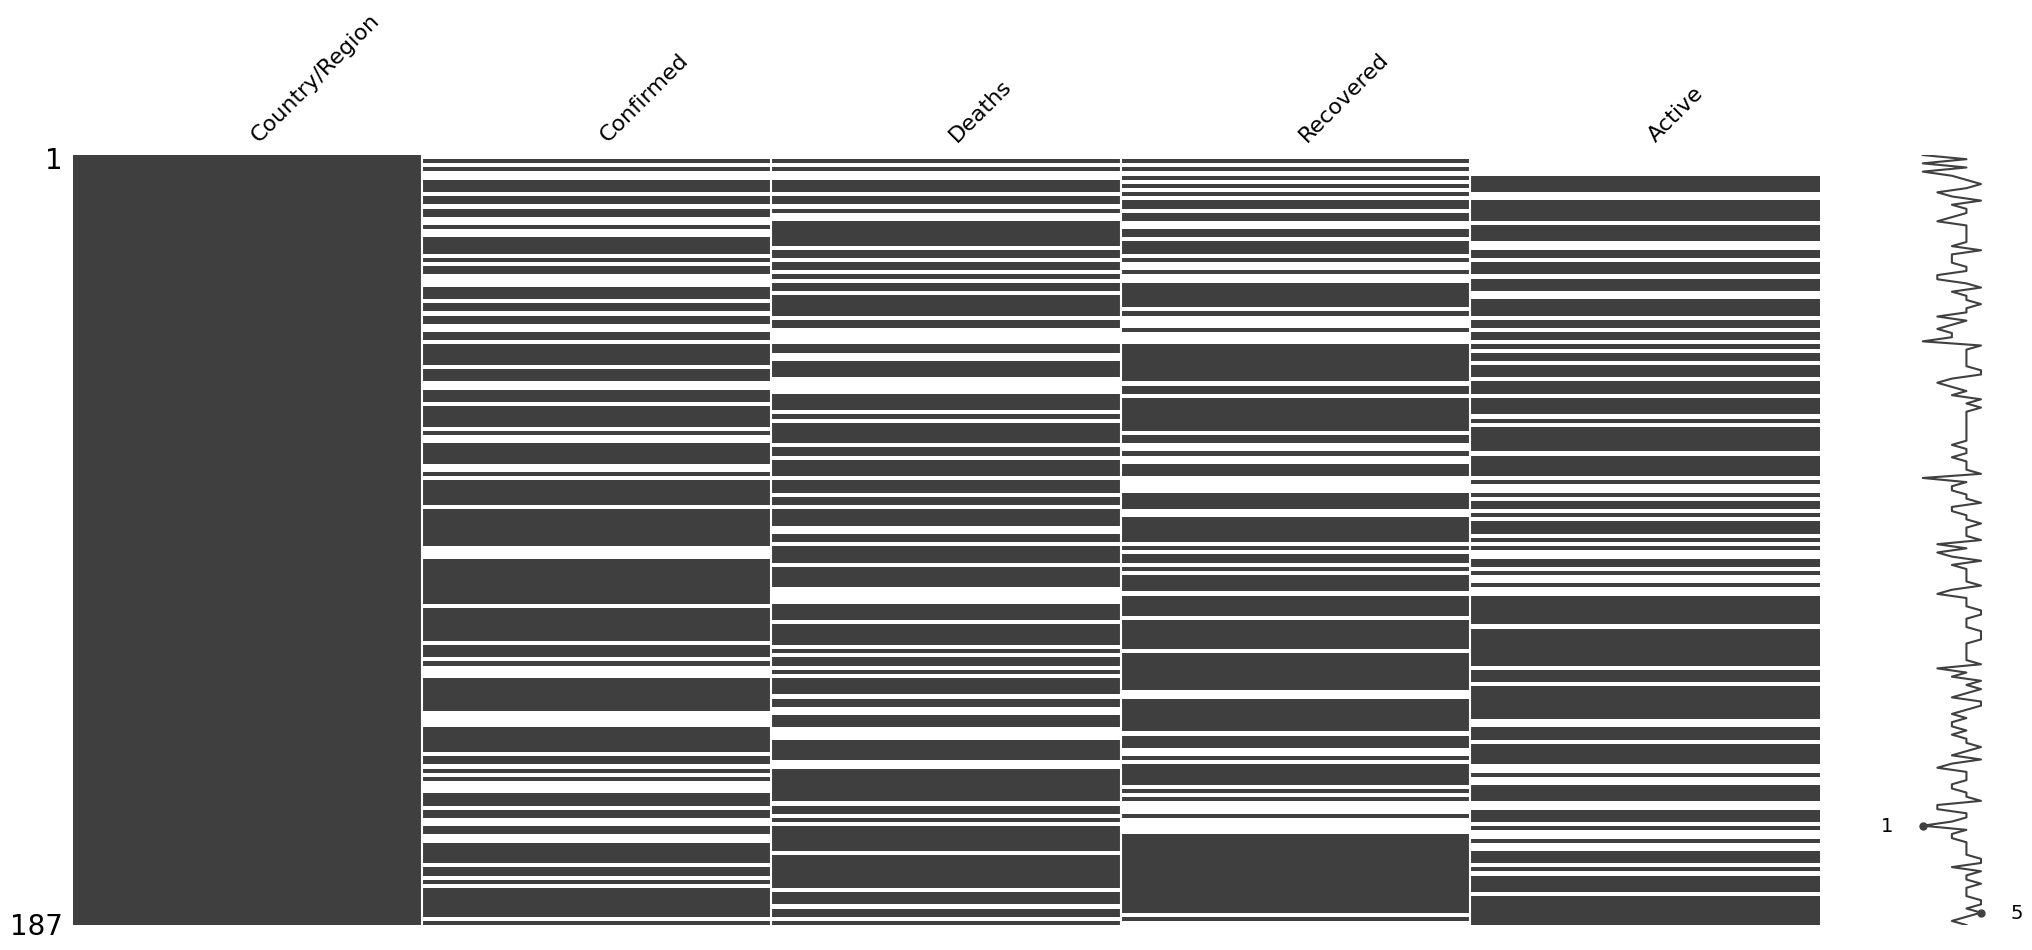

In [3]:
# Visualize missing values as a matrix
msno.matrix(data)

#### Cantidad de valores faltantes por columna

In [4]:
data.isnull().sum()

Country/Region     0
Confirmed         59
Deaths            59
Recovered         59
Active            59
dtype: int64

In [5]:
data.shape

(187, 5)

# Handling missing values

## 1. Drop NA values

In [6]:
data_withou_na = data.copy()

data_withou_na = data_withou_na.dropna()
print(data_withou_na.isna().sum())
print(data_withou_na.shape)

Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64
(36, 5)


In [7]:
data_withou_na_col = data.copy()

data_withou_na_col = data_withou_na_col.dropna(axis=1)
print(data_withou_na_col.isna().sum())
print(data_withou_na_col.shape)

Country/Region    0
dtype: int64
(187, 1)


## 2. Imputation Methods

#### 2.1 Imputation with a Fixed value

In [8]:
#Copiamos la data original
data_filled_fixed_value = data.copy()

#Llenamos los valores faltantes con un valor fijo (0 en este caso)
data_filled_fixed_value = data_filled_fixed_value.fillna(0)

#Mostramos el resultado
print(data_filled_fixed_value.head(5))

  Country/Region  Confirmed  Deaths  Recovered  Active
0    Afghanistan        0.0     0.0        0.0     0.0
1        Albania     4880.0   144.0     2745.0     0.0
2        Algeria        0.0     0.0        0.0     0.0
3        Andorra      907.0    52.0      803.0     0.0
4         Angola        0.0     0.0        0.0     0.0


### 2.2 Imputation with statistical measures

#### Mean

In [9]:
# Copiar la data original
data_filled_mean = data.copy()

# Rellena los valores NA con la media
data_filled_mean = data_filled_mean.fillna(data_filled_mean.mean(numeric_only=True))

# Mostrar el resultado
print(data_filled_mean.head(5))

  Country/Region      Confirmed       Deaths     Recovered        Active
0    Afghanistan  100022.515625  4461.195312  56304.851562  44922.992188
1        Albania    4880.000000   144.000000   2745.000000  44922.992188
2        Algeria  100022.515625  4461.195312  56304.851562  44922.992188
3        Andorra     907.000000    52.000000    803.000000  44922.992188
4         Angola  100022.515625  4461.195312  56304.851562  44922.992188


#### Median

In [10]:
# Copiar la data original
data_filled_median = data.copy()

# Rellena los valores NA con la mediana
data_filled_median = data_filled_median.fillna(data_filled_median.median(numeric_only=True))

# Mostrar el resultado
print(data_filled_median.head(5))

  Country/Region  Confirmed  Deaths  Recovered  Active
0    Afghanistan     4739.5   157.0     3540.5  1979.5
1        Albania     4880.0   144.0     2745.0  1979.5
2        Algeria     4739.5   157.0     3540.5  1979.5
3        Andorra      907.0    52.0      803.0  1979.5
4         Angola     4739.5   157.0     3540.5  1979.5


#### Mode

In [11]:
# Copiar la data original
data_filled_mode = data.copy()

# Rellena los valores NA con la mediana
data_filled_mode = data_filled_mode.fillna(data_filled_mode.mode(numeric_only=True).iloc[0])

# Mostrar el resultado
print(data_filled_mode.head(5))

  Country/Region  Confirmed  Deaths  Recovered  Active
0    Afghanistan       24.0     0.0        0.0     0.0
1        Albania     4880.0   144.0     2745.0     0.0
2        Algeria       24.0     0.0        0.0     0.0
3        Andorra      907.0    52.0      803.0     0.0
4         Angola       24.0     0.0        0.0     0.0


### 2.5 Forward Fill and Backward Fill.

Para este tipo de imputación de datos utilizaremos el PIB per cápita de Estados Unidos.

**Nota:** Los datos que se utilizarán han sido tomados del banco mundial.

#### Limpiemos la base de datos y filtremos el pais que queremos

In [12]:
pib_per_capita_global = pd.read_excel('../datos/pib_per_capita_global.xls', sheet_name='Data', skiprows=3)

#Filtramos solo a Estados Unidos
usa = pib_per_capita_global[pib_per_capita_global['Country Code'] == 'USA']

#No presenta ningún valor faltante
usa.isna().sum().sort_values(ascending=False)

#Eliminar columnas innecesarias
usa = usa.drop(columns=['Country Code', 'Country Name', 'Indicator Code', 'Indicator Name'])

#Transponer la data
usa = usa.T.reset_index()

#Cambiar el nombre de las columnas
usa.columns = ['year', 'pib_per_capita']
usa.to_csv('../datos/usa_pib_per_capita.csv', index=False)


#### Cargamos base de datos y librerias necesarias

In [13]:
pib_per_capita_usa_complete = pd.read_csv('../datos/usa_pib_per_capita.csv')

# Copiamos la data original para trabajar con estso datos
pib_per_capita_usa = pib_per_capita_usa_complete.copy()

# Insertar 20% de valores NaN en la columna 'pib_per_capita' de forma aleatoria
np.random.seed(22)
pib_per_capita_usa.loc[pib_per_capita_usa.sample(frac=0.2).index, 'pib_per_capita'] = np.nan

# Mostrar el resultado
print(pib_per_capita_usa)

    year  pib_per_capita
0   1960    18991.544603
1   1961    19108.935365
2   1962    19965.143575
3   1963    20545.784245
4   1964    21437.584070
..   ...             ...
59  2019    61400.548154
60  2020             NaN
61  2021    62996.289384
62  2022             NaN
63  2023             NaN

[64 rows x 2 columns]


### Graficamos el comportamiento

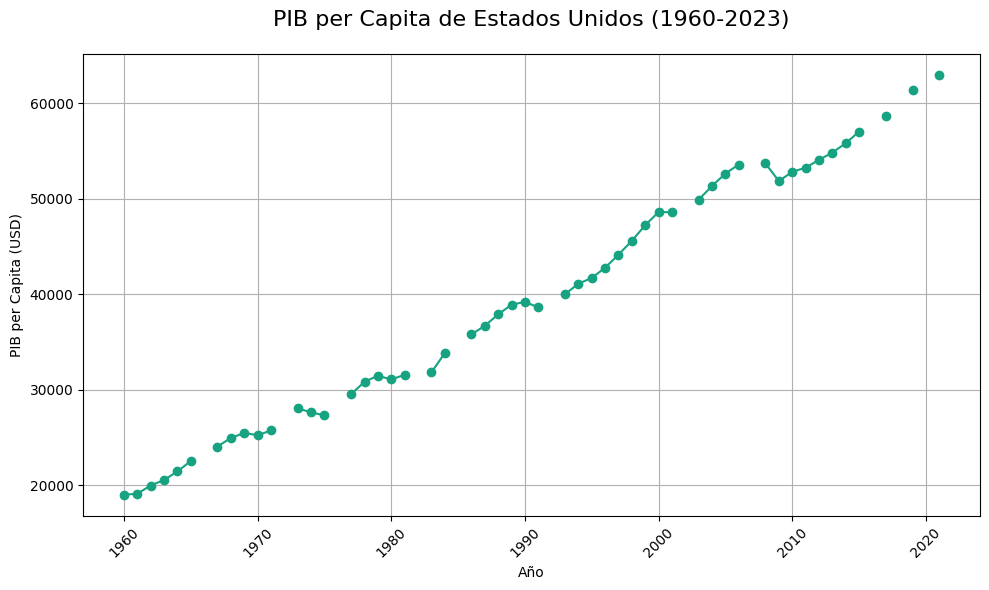

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(pib_per_capita_usa['year'], pib_per_capita_usa['pib_per_capita'], marker='o', linestyle='-', color='#17A381')
plt.title('PIB per Capita de Estados Unidos (1960-2023)', fontsize=16, pad=20)
plt.xlabel('Año')
plt.ylabel('PIB per Capita (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Forward Fill

C:\Users\Alic Barandica\AppData\Local\Temp\ipykernel_22248\1932871871.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pib_per_capita_usa_ffill = pib_per_capita_usa_ffill.fillna(method='ffill')


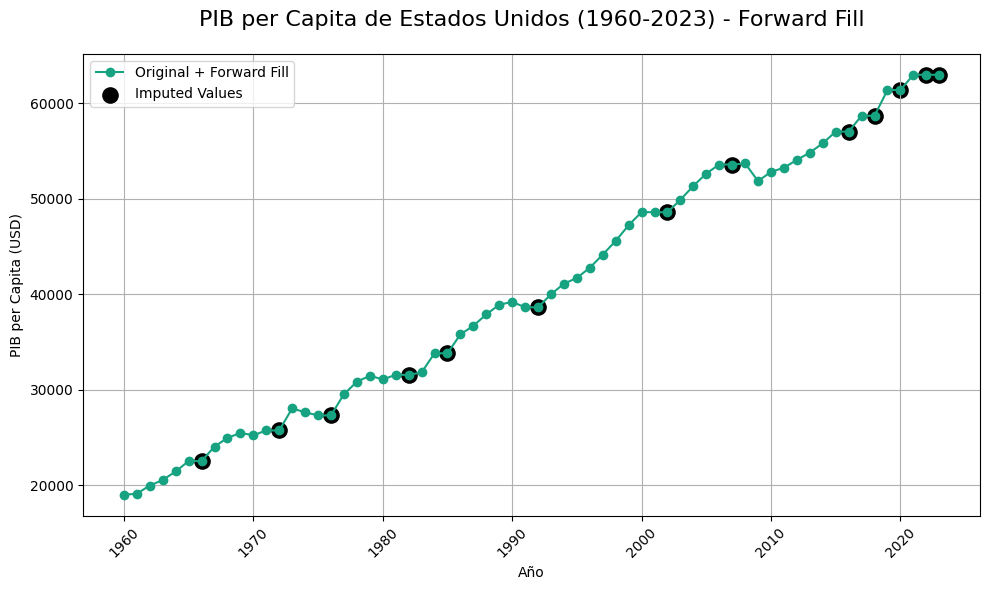

In [15]:
# Copiamos la data original
pib_per_capita_usa_ffill = pib_per_capita_usa.copy()

# Guardamos los indices con valores NA
imputed_indices = pib_per_capita_usa_ffill[pib_per_capita_usa['pib_per_capita'].isna()].index

# Aplicar el forward fill
pib_per_capita_usa_ffill = pib_per_capita_usa_ffill.fillna(method='ffill')

# Graficar el resultado con los valores imputados en otro color
plt.figure(figsize=(10, 6))
plt.plot(pib_per_capita_usa_ffill['year'], pib_per_capita_usa_ffill['pib_per_capita'], marker='o', linestyle='-', color='#17A381', label='Original + Forward Fill')

# Resaltar los valores imputados
plt.scatter(pib_per_capita_usa_ffill.loc[imputed_indices, 'year'], pib_per_capita_usa_ffill.loc[imputed_indices, 'pib_per_capita'], color='black', marker="o", s=120, label='Imputed Values')

plt.title('PIB per Capita de Estados Unidos (1960-2023) - Forward Fill', fontsize=16, pad=20)
plt.xlabel('Año')
plt.ylabel('PIB per Capita (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Backward Fill

C:\Users\Alic Barandica\AppData\Local\Temp\ipykernel_22248\919536692.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pib_per_capita_usa_bfill = pib_per_capita_usa_bfill.fillna(method='bfill')


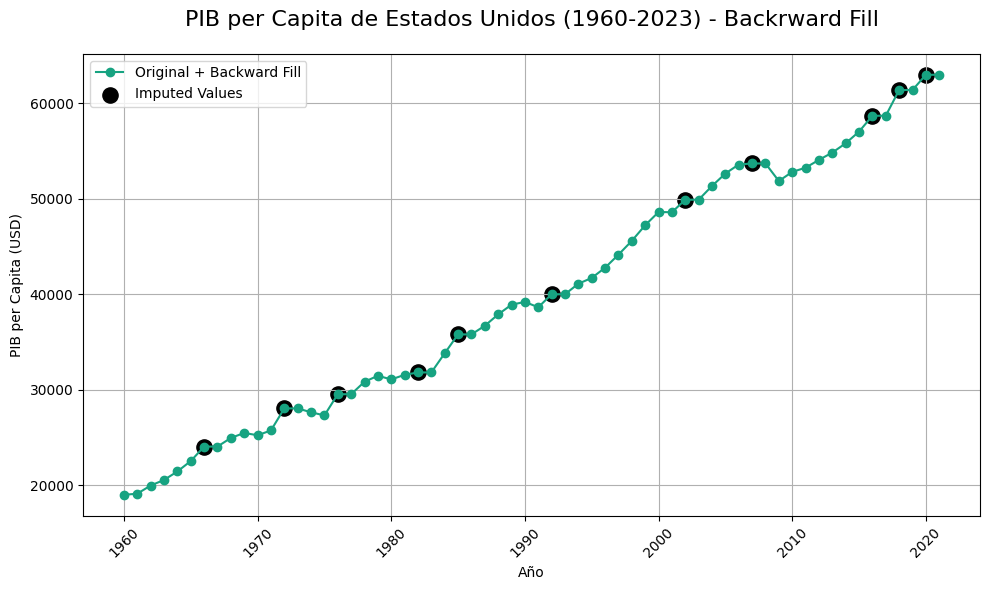

In [16]:
# Copiamos la data original
pib_per_capita_usa_bfill = pib_per_capita_usa.copy()

# Guardamos los indices con valores NA
imputed_indices = pib_per_capita_usa_bfill[pib_per_capita_usa['pib_per_capita'].isna()].index

# Aplicar el forward fill
pib_per_capita_usa_bfill = pib_per_capita_usa_bfill.fillna(method='bfill')

# Graficar el resultado con los valores imputados en otro color
plt.figure(figsize=(10, 6))
plt.plot(pib_per_capita_usa_bfill['year'], pib_per_capita_usa_bfill['pib_per_capita'], marker='o', linestyle='-', color='#17A381', label='Original + Backward Fill')

# Resaltar los valores imputados
plt.scatter(pib_per_capita_usa_bfill.loc[imputed_indices, 'year'], pib_per_capita_usa_bfill.loc[imputed_indices, 'pib_per_capita'], color='black', marker="o", s=120, label='Imputed Values')

plt.title('PIB per Capita de Estados Unidos (1960-2023) - Backrward Fill', fontsize=16, pad=20)
plt.xlabel('Año')
plt.ylabel('PIB per Capita (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

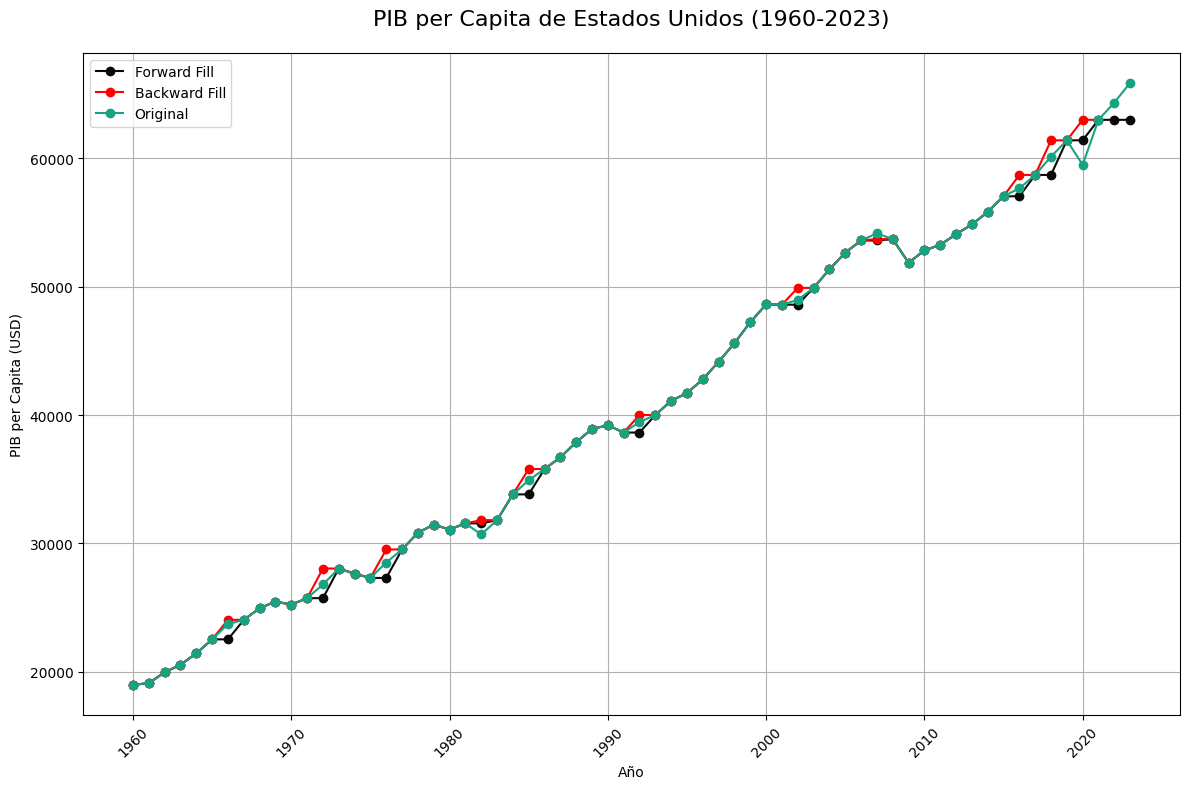

In [17]:
plt.figure(figsize=(12, 8))

# Gráfico con forward fill
plt.plot(pib_per_capita_usa_ffill['year'], pib_per_capita_usa_ffill['pib_per_capita'], marker='o', linestyle='-', color='#090909', label='Forward Fill')

# Gráfico con backward fill
plt.plot(pib_per_capita_usa_bfill['year'], pib_per_capita_usa_bfill['pib_per_capita'], marker='o', linestyle='-', color='red', label='Backward Fill')

# Gráfico original con valores NA
plt.plot(pib_per_capita_usa_complete['year'], pib_per_capita_usa_complete['pib_per_capita'], marker='o', linestyle='-', color='#17A381', label='Original')

# Añadir título y etiquetas
plt.title('PIB per Capita de Estados Unidos (1960-2023)', fontsize=16, pad=20)
plt.xlabel('Año')
plt.ylabel('PIB per Capita (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

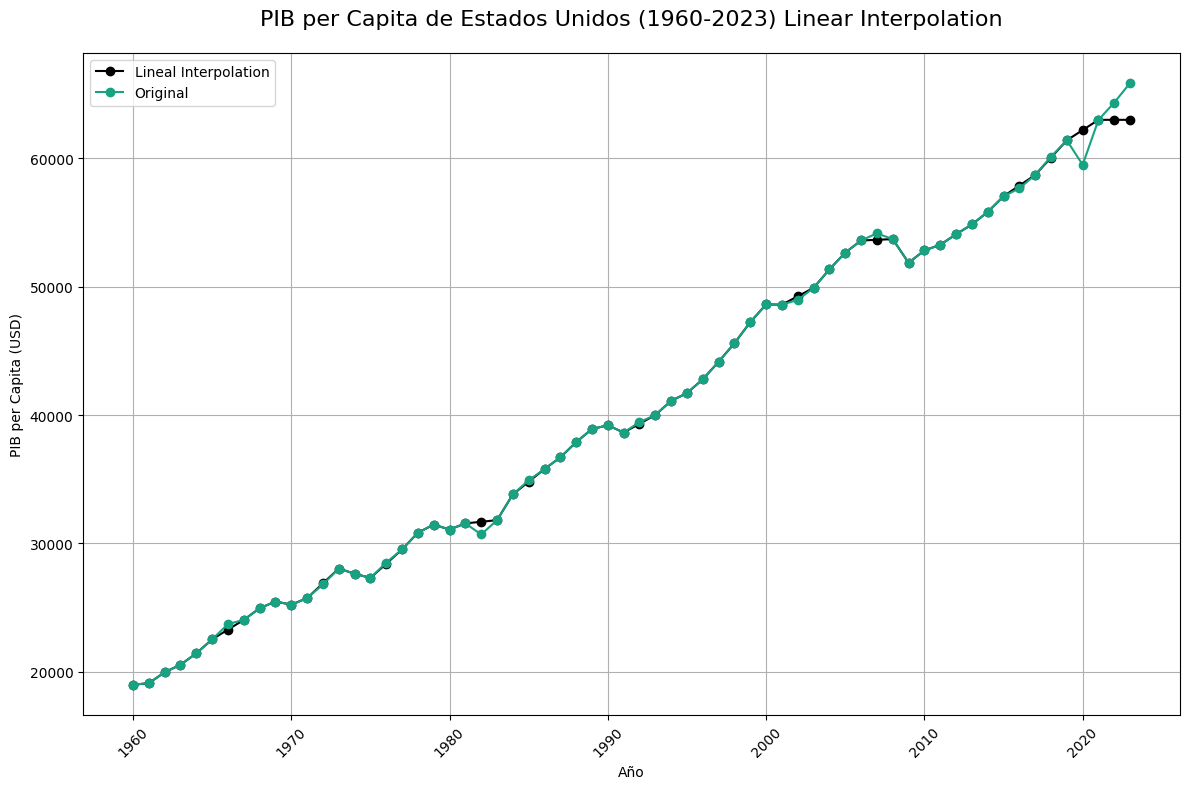

In [31]:
# Copiamos la data original
pib_interpolation = pib_per_capita_usa.copy()

# Interpolamos los valores faltantes
pib_interpolation['pib_per_capita'] = pib_interpolation['pib_per_capita'].interpolate(method='linear')

# Creamos los graficos
plt.figure(figsize=(12, 8))
# Gráfico con interpolación lineal
plt.plot(pib_interpolation['year'], pib_interpolation['pib_per_capita'], marker='o', linestyle='-', color='black', label='Lineal Interpolation')

# Gráfico con valores originales
plt.plot(pib_per_capita_usa_complete['year'], pib_per_capita_usa_complete['pib_per_capita'], marker='o', linestyle='-', color='#17A381', label='Original')

# Añadir título y etiquetas
plt.title('PIB per Capita de Estados Unidos (1960-2023) Linear Interpolation', fontsize=16, pad=20)
plt.xlabel('Año')
plt.ylabel('PIB per Capita (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()